# Importing the Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import confusion_matrix,accuracy_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.svm import SVR
from sklearn.externals import joblib
from sklearn import metrics
import sklearn.metrics
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense


C:\Users\vajrak\Anaconda3\envs\ztdl\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
C:\Users\vajrak\Anaconda3\envs\ztdl\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Loading The Data

In [3]:
data = pd.read_excel (r'BreastCancer_Prognostic_v1.xlsx')

# Data Cleaning:
#### It contains ID of the patients which plays no role in modeling.
#### We are encoding the labels of outcome column with numbers. R:1,N:0.
#### We are replacing the missing values with the mean value of the column.

In [4]:
data.head()

ID Outcome  Time  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  119513       N    31        18.02         27.60          117.50     1013.0   
1    8423       N    61        17.99         10.38          122.80     1001.0   
2  842517       N   116        21.37         17.44          137.50     1373.0   
3  843483       N   123        11.42         20.38           77.58      386.1   
4  843584       R    27        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.09489            0.1036          0.1086              0.07055   
1          0.11840            0.2776          0.3001              0.14710   
2          0.08836            0.1189          0.1255              0.08180   
3          0.14250            0.2839          0.2414              0.10520   
4          0.10030            0.1328          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_std_dev  texture_std_dev  \
0         0.1865                 0.06333          0.6249           1.8900   
1         0.2419                 0.07871          1.0950           0.9053   
2         0.2333                 0.06010          0.5854           0.6105   
3         0.2597                 0.09744          0.4956           1.1560   
4         0.1809                 0.05883          0.7572           0.7813   

   perimeter_std_dev  area_std_dev  smoothness_std_dev  compactness_std_dev  \
0              3.972         71.55            0.004433              0.01421   
1              8.589        153.40            0.006399              0.04904   
2              3.928         82.15            0.006167              0.03449   
3              3.445         27.23            0.009110              0.07458   
4              5.438         94.44            0.011490              0.02461   

   concavity_std_dev  concave_points_std_dev  symmetry_std_dev  \
0            0.03233                0.009854           0.01694   
1            0.05373                0.015870           0.03003   
2            0.03300                0.018050           0.03094   
3            0.05661                0.018670           0.05963   
4            0.05688                0.018850           0.01756   

   fractal_dimension_std_dev  Worst_radius  Worst_texture  Worst_perimeter  \
0                   0.003495         21.63          37.08           139.70   
1                   0.006193         25.38          17.33           184.60   
2                   0.005039         24.90          20.98           159.10   
3                   0.009208         14.91          26.50            98.87   
4                   0.005115         22.54          16.67           152.20   

   Worst_area  Worst_smoothness  Worst_compactness  Worst_concavity  \
0      1436.0            0.1195             0.1926           0.3140   
1      2019.0            0.1622             0.6656           0.7119   
2      1949.0            0.1188             0.3449           0.3414   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   Worst_concave_points  Worst_symmetry  Worst_fractal_dimension  Tumor_Size  \
0                0.1170          0.2677                  0.08113         5.0   
1                0.2654          0.4601                  0.11890         3.0   
2                0.2032          0.4334                  0.09067         2.5   
3                0.2575          0.6638                  0.17300         2.0   
4                0.1625          0.2364                  0.07678         3.5   

  Lymph_Node_Status  
0                 5  
1                 2  
2                 0  
3                 0  
4                 0

In [5]:
data.shape

(198, 35)

In [6]:
data.drop("ID",axis=1,inplace=True)

In [7]:
data.shape

(198, 34)

In [8]:
data.head()

Outcome  Time  radius_mean  texture_mean  perimeter_mean  area_mean  \
0       N    31        18.02         27.60          117.50     1013.0   
1       N    61        17.99         10.38          122.80     1001.0   
2       N   116        21.37         17.44          137.50     1373.0   
3       N   123        11.42         20.38           77.58      386.1   
4       R    27        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.09489            0.1036          0.1086              0.07055   
1          0.11840            0.2776          0.3001              0.14710   
2          0.08836            0.1189          0.1255              0.08180   
3          0.14250            0.2839          0.2414              0.10520   
4          0.10030            0.1328          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_std_dev  texture_std_dev  \
0         0.1865                 0.06333          0.6249           1.8900   
1         0.2419                 0.07871          1.0950           0.9053   
2         0.2333                 0.06010          0.5854           0.6105   
3         0.2597                 0.09744          0.4956           1.1560   
4         0.1809                 0.05883          0.7572           0.7813   

   perimeter_std_dev  area_std_dev  smoothness_std_dev  compactness_std_dev  \
0              3.972         71.55            0.004433              0.01421   
1              8.589        153.40            0.006399              0.04904   
2              3.928         82.15            0.006167              0.03449   
3              3.445         27.23            0.009110              0.07458   
4              5.438         94.44            0.011490              0.02461   

   concavity_std_dev  concave_points_std_dev  symmetry_std_dev  \
0            0.03233                0.009854           0.01694   
1            0.05373                0.015870           0.03003   
2            0.03300                0.018050           0.03094   
3            0.05661                0.018670           0.05963   
4            0.05688                0.018850           0.01756   

   fractal_dimension_std_dev  Worst_radius  Worst_texture  Worst_perimeter  \
0                   0.003495         21.63          37.08           139.70   
1                   0.006193         25.38          17.33           184.60   
2                   0.005039         24.90          20.98           159.10   
3                   0.009208         14.91          26.50            98.87   
4                   0.005115         22.54          16.67           152.20   

   Worst_area  Worst_smoothness  Worst_compactness  Worst_concavity  \
0      1436.0            0.1195             0.1926           0.3140   
1      2019.0            0.1622             0.6656           0.7119   
2      1949.0            0.1188             0.3449           0.3414   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   Worst_concave_points  Worst_symmetry  Worst_fractal_dimension  Tumor_Size  \
0                0.1170          0.2677                  0.08113         5.0   
1                0.2654          0.4601                  0.11890         3.0   
2                0.2032          0.4334                  0.09067         2.5   
3                0.2575          0.6638                  0.17300         2.0   
4                0.1625          0.2364                  0.07678         3.5   

  Lymph_Node_Status  
0                 5  
1                 2  
2                 0  
3                 0  
4                 0

In [9]:
le=LabelEncoder()
data['Outcome'] = le.fit_transform(data['Outcome'])

In [10]:
data.head()

Outcome  Time  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        0    31        18.02         27.60          117.50     1013.0   
1        0    61        17.99         10.38          122.80     1001.0   
2        0   116        21.37         17.44          137.50     1373.0   
3        0   123        11.42         20.38           77.58      386.1   
4        1    27        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.09489            0.1036          0.1086              0.07055   
1          0.11840            0.2776          0.3001              0.14710   
2          0.08836            0.1189          0.1255              0.08180   
3          0.14250            0.2839          0.2414              0.10520   
4          0.10030            0.1328          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_std_dev  texture_std_dev  \
0         0.1865                 0.06333          0.6249           1.8900   
1         0.2419                 0.07871          1.0950           0.9053   
2         0.2333                 0.06010          0.5854           0.6105   
3         0.2597                 0.09744          0.4956           1.1560   
4         0.1809                 0.05883          0.7572           0.7813   

   perimeter_std_dev  area_std_dev  smoothness_std_dev  compactness_std_dev  \
0              3.972         71.55            0.004433              0.01421   
1              8.589        153.40            0.006399              0.04904   
2              3.928         82.15            0.006167              0.03449   
3              3.445         27.23            0.009110              0.07458   
4              5.438         94.44            0.011490              0.02461   

   concavity_std_dev  concave_points_std_dev  symmetry_std_dev  \
0            0.03233                0.009854           0.01694   
1            0.05373                0.015870           0.03003   
2            0.03300                0.018050           0.03094   
3            0.05661                0.018670           0.05963   
4            0.05688                0.018850           0.01756   

   fractal_dimension_std_dev  Worst_radius  Worst_texture  Worst_perimeter  \
0                   0.003495         21.63          37.08           139.70   
1                   0.006193         25.38          17.33           184.60   
2                   0.005039         24.90          20.98           159.10   
3                   0.009208         14.91          26.50            98.87   
4                   0.005115         22.54          16.67           152.20   

   Worst_area  Worst_smoothness  Worst_compactness  Worst_concavity  \
0      1436.0            0.1195             0.1926           0.3140   
1      2019.0            0.1622             0.6656           0.7119   
2      1949.0            0.1188             0.3449           0.3414   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   Worst_concave_points  Worst_symmetry  Worst_fractal_dimension  Tumor_Size  \
0                0.1170          0.2677                  0.08113         5.0   
1                0.2654          0.4601                  0.11890         3.0   
2                0.2032          0.4334                  0.09067         2.5   
3                0.2575          0.6638                  0.17300         2.0   
4                0.1625          0.2364                  0.07678         3.5   

  Lymph_Node_Status  
0                 5  
1                 2  
2                 0  
3                 0  
4                 0

In [11]:
data=data.replace('?', np.NaN)

In [12]:
data['Lymph_Node_Status'] = data['Lymph_Node_Status'].fillna(data['Lymph_Node_Status'].mean())

In [13]:
data.head()

Outcome  Time  radius_mean  texture_mean  perimeter_mean  area_mean  \
0        0    31        18.02         27.60          117.50     1013.0   
1        0    61        17.99         10.38          122.80     1001.0   
2        0   116        21.37         17.44          137.50     1373.0   
3        0   123        11.42         20.38           77.58      386.1   
4        1    27        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.09489            0.1036          0.1086              0.07055   
1          0.11840            0.2776          0.3001              0.14710   
2          0.08836            0.1189          0.1255              0.08180   
3          0.14250            0.2839          0.2414              0.10520   
4          0.10030            0.1328          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_std_dev  texture_std_dev  \
0         0.1865                 0.06333          0.6249           1.8900   
1         0.2419                 0.07871          1.0950           0.9053   
2         0.2333                 0.06010          0.5854           0.6105   
3         0.2597                 0.09744          0.4956           1.1560   
4         0.1809                 0.05883          0.7572           0.7813   

   perimeter_std_dev  area_std_dev  smoothness_std_dev  compactness_std_dev  \
0              3.972         71.55            0.004433              0.01421   
1              8.589        153.40            0.006399              0.04904   
2              3.928         82.15            0.006167              0.03449   
3              3.445         27.23            0.009110              0.07458   
4              5.438         94.44            0.011490              0.02461   

   concavity_std_dev  concave_points_std_dev  symmetry_std_dev  \
0            0.03233                0.009854           0.01694   
1            0.05373                0.015870           0.03003   
2            0.03300                0.018050           0.03094   
3            0.05661                0.018670           0.05963   
4            0.05688                0.018850           0.01756   

   fractal_dimension_std_dev  Worst_radius  Worst_texture  Worst_perimeter  \
0                   0.003495         21.63          37.08           139.70   
1                   0.006193         25.38          17.33           184.60   
2                   0.005039         24.90          20.98           159.10   
3                   0.009208         14.91          26.50            98.87   
4                   0.005115         22.54          16.67           152.20   

   Worst_area  Worst_smoothness  Worst_compactness  Worst_concavity  \
0      1436.0            0.1195             0.1926           0.3140   
1      2019.0            0.1622             0.6656           0.7119   
2      1949.0            0.1188             0.3449           0.3414   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   Worst_concave_points  Worst_symmetry  Worst_fractal_dimension  Tumor_Size  \
0                0.1170          0.2677                  0.08113         5.0   
1                0.2654          0.4601                  0.11890         3.0   
2                0.2032          0.4334                  0.09067         2.5   
3                0.2575          0.6638                  0.17300         2.0   
4                0.1625          0.2364                  0.07678         3.5   

   Lymph_Node_Status  
0                5.0  
1                2.0  
2                0.0  
3                0.0  
4                0.0

# Exploratory Data Analysis:

#### Creating a correlation matrix for the features.

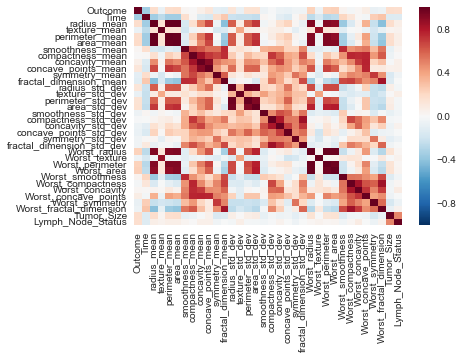

In [14]:
corrmatrix = data.corr()
sns.heatmap(corrmatrix)

In [15]:
data.describe()

Outcome        Time  radius_mean  texture_mean  perimeter_mean  \
count  198.000000  198.000000   198.000000     198.00000      198.000000   
mean     0.237374   46.732323    17.412323      22.27601      114.856566   
std      0.426552   34.462870     3.161676       4.29829       21.383402   
min      0.000000    1.000000    10.950000      10.38000       71.900000   
25%      0.000000   14.000000    15.052500      19.41250       98.160000   
50%      0.000000   39.500000    17.290000      21.75000      113.700000   
75%      0.000000   72.750000    19.580000      24.65500      129.650000   
max      1.000000  125.000000    27.220000      39.28000      182.100000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   198.000000       198.000000        198.000000      198.000000   
mean    970.040909         0.102681          0.142648        0.156243   
std     352.149215         0.012522          0.049898        0.070572   
min     361.600000         0.074970          0.046050        0.023980   
25%     702.525000         0.093900          0.110200        0.106850   
50%     929.100000         0.101900          0.131750        0.151350   
75%    1193.500000         0.110975          0.172200        0.200500   
max    2250.000000         0.144700          0.311400        0.426800   

       concave_points_mean  symmetry_mean  fractal_dimension_mean  \
count           198.000000     198.000000              198.000000   
mean              0.086776       0.192754                0.062706   
std               0.033877       0.027437                0.007240   
min               0.020310       0.130800                0.050250   
25%               0.063670       0.174075                0.056718   
50%               0.086075       0.189350                0.061715   
75%               0.103925       0.209325                0.066715   
max               0.201200       0.304000                0.097440   

       radius_std_dev  texture_std_dev  perimeter_std_dev  area_std_dev  \
count      198.000000       198.000000         198.000000    198.000000   
mean         0.603346         1.264450           4.255394     70.228737   
std          0.310112         0.526467           2.194128     47.982255   
min          0.193800         0.362100           1.153000     13.990000   
25%          0.388200         0.921300           2.742500     35.365000   
50%          0.533250         1.168500           3.767000     58.455000   
75%          0.750900         1.463250           5.212750     92.477500   
max          1.819000         3.503000          13.280000    316.000000   

       smoothness_std_dev  compactness_std_dev  concavity_std_dev  \
count          198.000000           198.000000         198.000000   
mean             0.006762             0.031199           0.040750   
std              0.002974             0.017613           0.020869   
min              0.002667             0.007347           0.010940   
25%              0.005001             0.019803           0.026810   
50%              0.006193             0.027880           0.036910   
75%              0.007973             0.038335           0.048970   
max              0.031130             0.135400           0.143800   

       concave_points_std_dev  symmetry_std_dev  fractal_dimension_std_dev  \
count              198.000000        198.000000                 198.000000   
mean                 0.015099          0.020555                   0.003987   
std                  0.005504          0.009578                   0.001938   
min                  0.005174          0.007882                   0.001087   
25%                  0.011422          0.014795                   0.002748   
50%                  0.014175          0.017905                   0.003719   
75%                  0.017665          0.022880                   0.004630   
max                  0.039270          0.060410                   0.012560   

       Worst_radius  Worst_texture  Worst_pe

0    151
1     47
Name: Outcome, dtype: int64


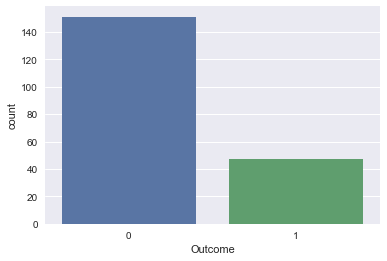

In [16]:

print(data['Outcome'].value_counts())
sns.countplot(x='Outcome',data=data)
plt.show()

In [17]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import itertools
# sns.pairplot(data=data,hue='Outcome',diag_kind='kde')
# plt.show()

### The output of above cell is given below:

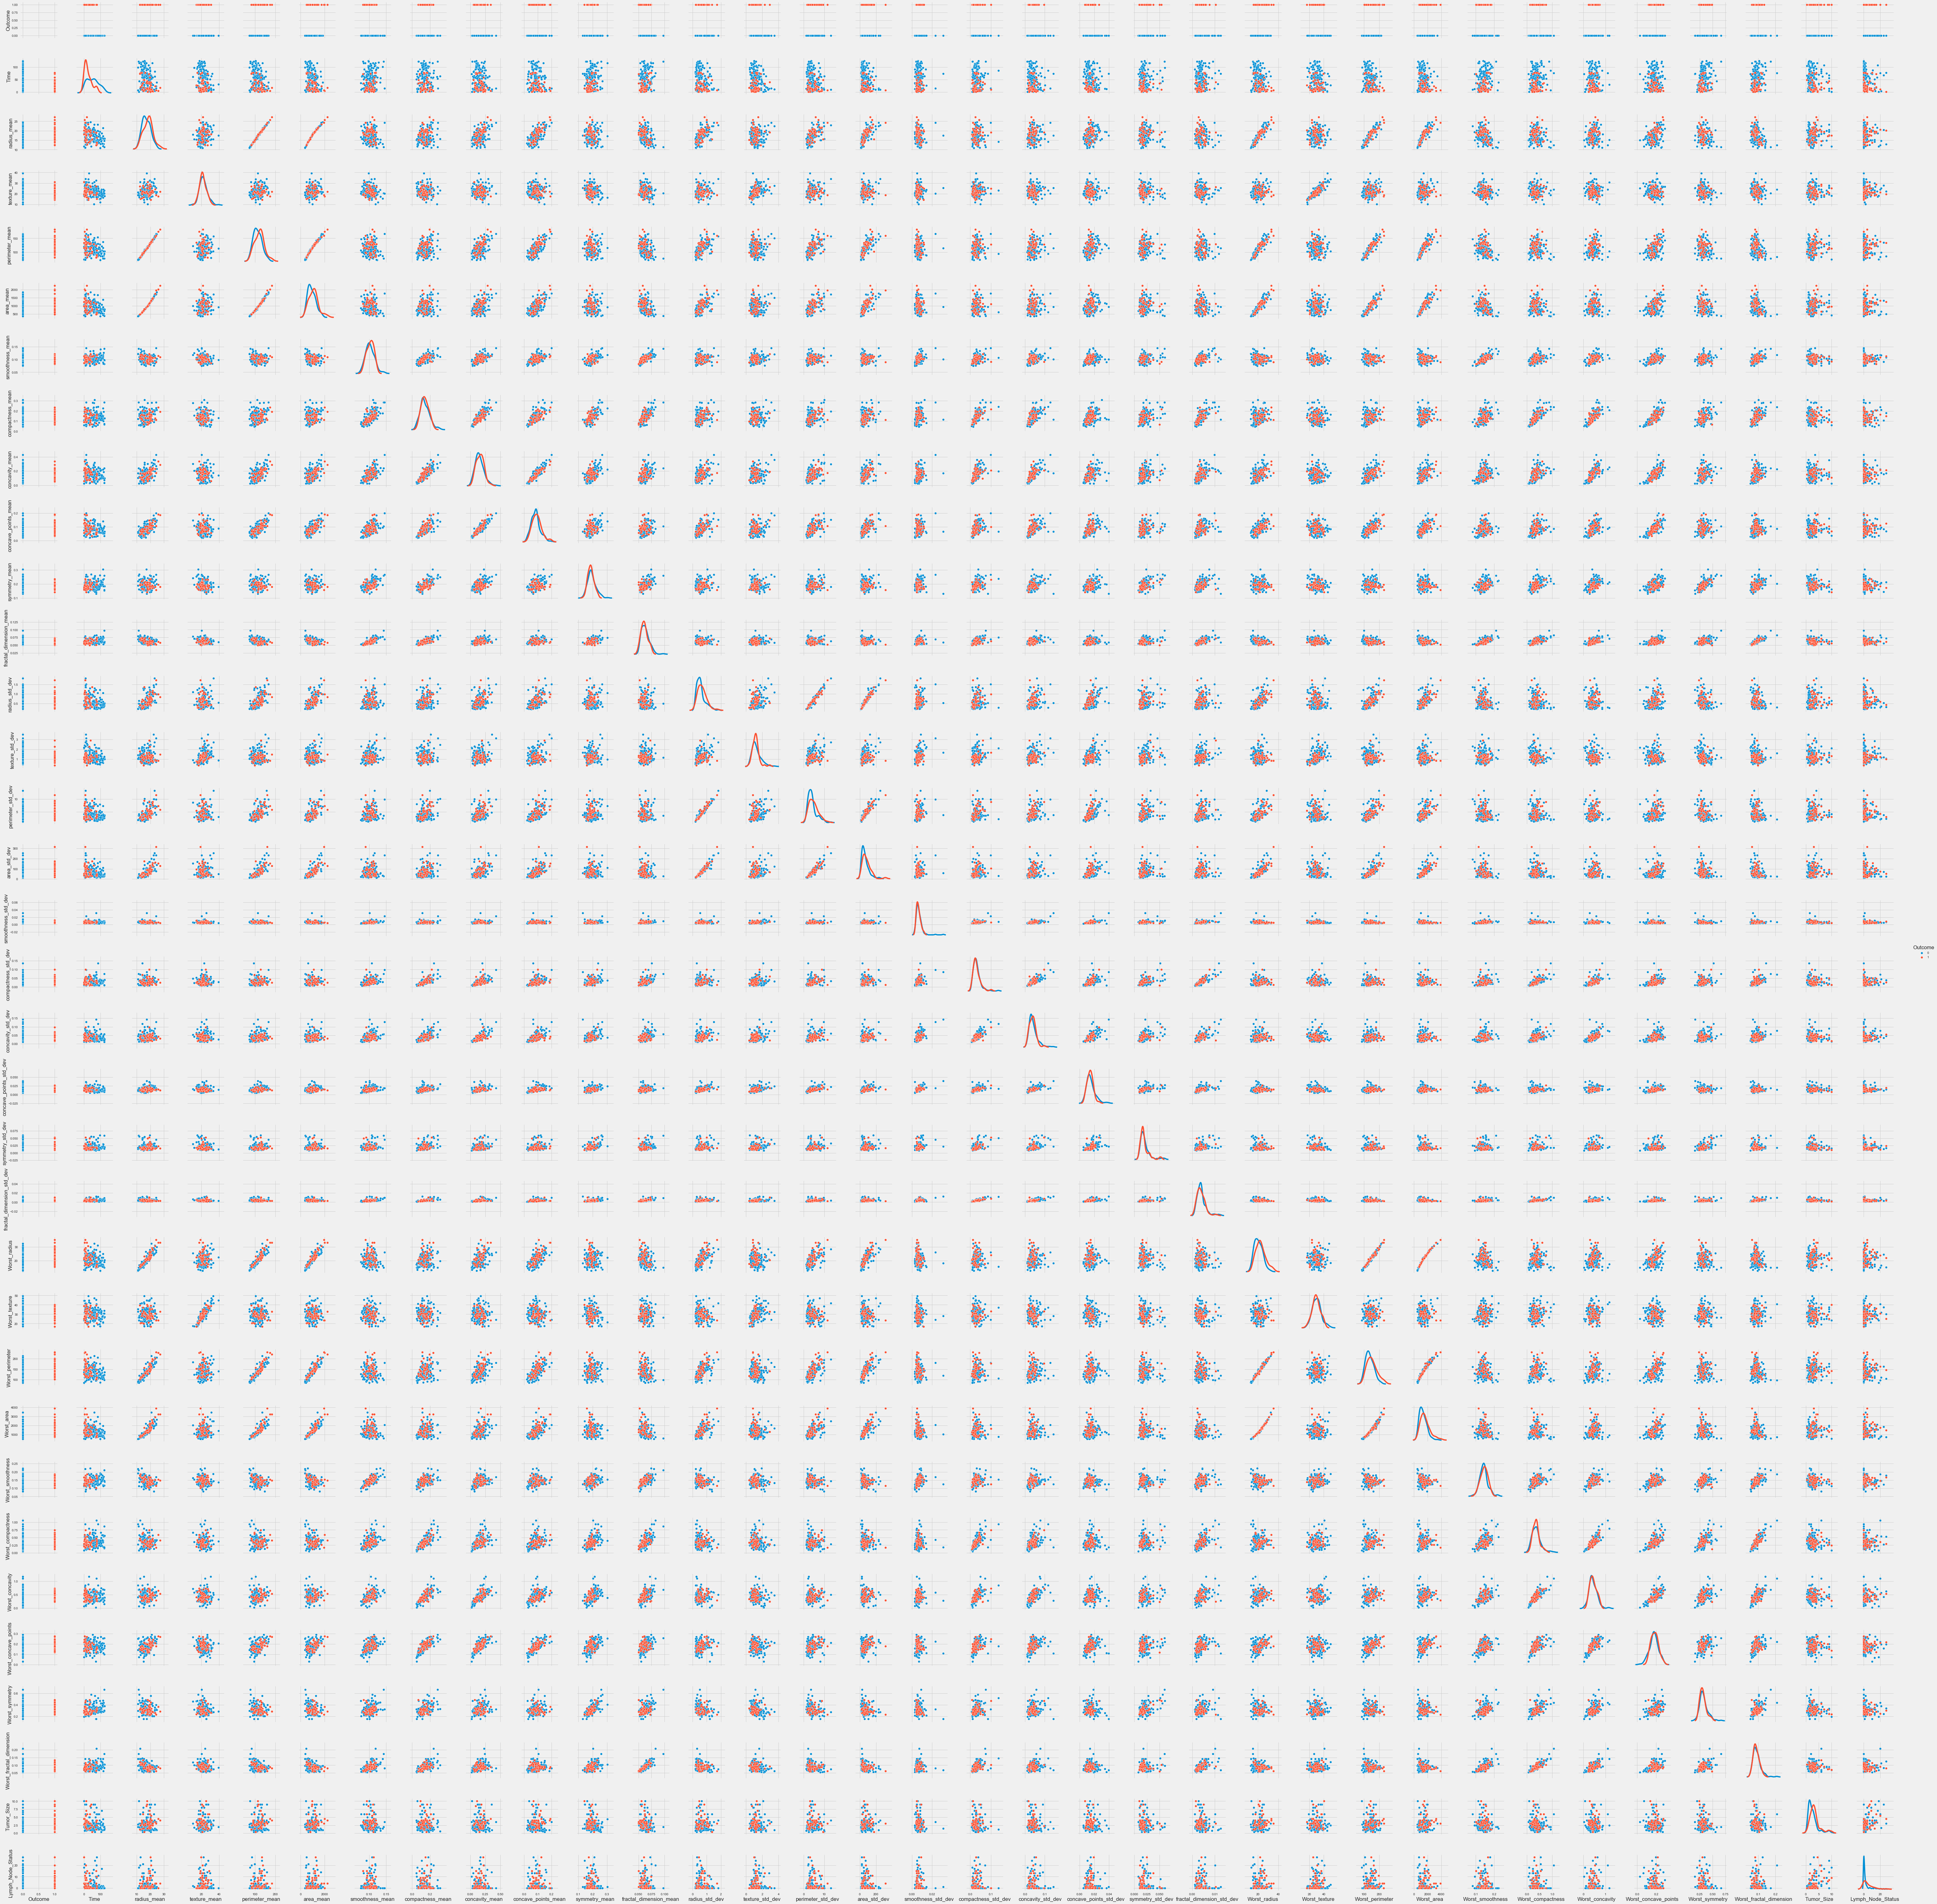

In [18]:
from IPython.display import Image
Image(filename='download.png')

## Observations:
#### As we see, The dataset is imbalanced. Recurrent classes are 47 and Nonrecurrent classes are 151.
#### The number of positive axillary lymph nodes of different for different patients. with largest number of lymph nodes to be as high as 27 where as few patients have no lymph nodes at all.
#### We can observe that the maximum time of recurrence of tumor is 125 and lowest is 1 units of time.
#### The correlation matrix gives the pairwise correlation between all the columns. 
#### We can clearly observe that the time of recurrence is poorly correlated with almost all the features.
#### It is important to notice that there is strong correlation between Smoothness, compactness, concavity of cells with fractal dimension of cells.
#### There is strong coorelation between features that are related to radius, perimeter, texture area of cell which is quite intuitive.
####  The scatter-plots shows the relation between each and every attribute or features takes pairwise. Looing at them, We can say that no two attributes are able to clearly separate the two outcome class instances
#### The diagonal shows the distribution of the dataset with the kernel density plots.

# Task1:

# Predictive Modeling:

### We create the whole data into the Features set and Class set.  We then split the data into train and test set.

In [19]:
X=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

#### Standardize features by removing the mean and scaling to unit variance

In [21]:
standscal=StandardScaler()
X_train=standscal.fit_transform(X_train)
X_test=standscal.fit_transform(X_test)

In [22]:
seed      = 9
scoring="accuracy"
results = []
names   = []

### We stack all the popular traditional classification algorithms side by side and compare their accuracies.

In [23]:
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=seed)))
# models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Trees', DecisionTreeClassifier(random_state=seed)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=seed)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))

In [24]:
# 10-fold cross validation
import sklearn.metrics
from sklearn.metrics import f1_score,accuracy_score
for name, model in models:
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    print(name)
    print("accuracy:",accuracy_score(y_test, Y_pred))
    f1 = f1_score(y_test, Y_pred,average='binary')
    print("f1 score: {:.2f}".format(f1))
    print('confusion matrix:')
    print(confusion_matrix(y_test, Y_pred))
    print('---------------------------------')

Logistic Regression
accuracy: 0.85
f1 score: 0.67
confusion matrix:
[[42  0]
 [ 9  9]]
---------------------------------
KNN
accuracy: 0.7
f1 score: 0.31
confusion matrix:
[[38  4]
 [14  4]]
---------------------------------
Decision Trees
accuracy: 0.65
f1 score: 0.46
confusion matrix:
[[30 12]
 [ 9  9]]
---------------------------------
Random Forest
accuracy: 0.7333333333333333
f1 score: 0.20
confusion matrix:
[[42  0]
 [16  2]]
---------------------------------
Naive Bayes
accuracy: 0.7
f1 score: 0.50
confusion matrix:
[[33  9]
 [ 9  9]]
---------------------------------
SVM
accuracy: 0.7166666666666667
f1 score: 0.11
confusion matrix:
[[42  0]
 [17  1]]
---------------------------------



#### Here we have took three performance metrics into consideration: Accuracy, f1-score and confusion matrix and ROC Curve.
#### Since the dataset is imbalanced we only need to look at f1-score and confusion matrix
#### We can clearly observe that Logistic regression has performed significantly well when compared to other classifiers. It is due to the ability of logistic regression which performs good especially where there is  binary classifiaction to be done.







## As It is imbalanced dataset we use the oversampling of the minority class technique to tackle this issue.

#### We move ahead with the logistic regression model as it gave the best performance.

In [25]:
smote=SMOTE()
X_sm,y_sm=smote.fit_sample(X,y)
X_trainsm,X_testsm,y_trainsm,y_testsm=train_test_split(X_sm,y_sm,test_size=0.3,random_state=123)

In [28]:

standscal=StandardScaler()
X_trainsm=standscal.fit_transform(X_trainsm)
X_testsm=standscal.fit_transform(X_testsm)

In [29]:
lr=LogisticRegression()
modellr=lr.fit(X_trainsm,y_trainsm)
predictionlr=modellr.predict(X_testsm)
cm=confusion_matrix(y_testsm,predictionlr)
cm

array([[36, 10],
       [ 6, 39]])

### As this is a medical dataset, reducing the false negatives is immensely important. So, We attempt to reduce that in following steps.

#### To do the same we are performing a grid search for Logistic Regression

In [30]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
best_clf = logreg_cv.fit(X_trainsm,y_trainsm)

#### After searching for the hyperparameters which assists the clasifiers the best, The following was found to be the best.

In [31]:
best_clf.best_estimator_.get_params()

{'C': 10.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [32]:
predictionclf=best_clf.predict(X_testsm)
cm=confusion_matrix(y_testsm,predictionclf)
cm

array([[34, 12],
       [ 3, 42]])

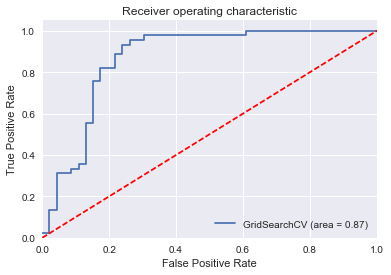

In [33]:
probs = best_clf.predict_proba(X_testsm)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_testsm, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [34]:
roc_auc

0.866183574879227

In [35]:
print('f1_score: ',f1_score(y_testsm,predictionclf, average='binary'))

f1_score:  0.8484848484848485


In [36]:
print('accuracy: ',accuracy_score(y_testsm,predictionclf))

accuracy:  0.8351648351648352


#### We have reduced the number of false negatives to a good extent. 

## Now, Lets see if Deep Learning architecture would do good in classifying the dataset.

In [37]:

model = Sequential()
model.add(Dense(16, input_dim=33, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_trainsm, y_trainsm, epochs=50, batch_size=10,validation_split=0.2)

Train on 168 samples, validate on 43 samples
Epoch 1/50
168/168 [==============================] - 0s - loss: 0.7302 - acc: 0.4524 - val_loss: 0.6847 - val_acc: 0.5116
Epoch 2/50
168/168 [==============================] - 0s - loss: 0.6978 - acc: 0.5060 - val_loss: 0.6754 - val_acc: 0.4884
Epoch 3/50
168/168 [==============================] - 0s - loss: 0.6773 - acc: 0.5536 - val_loss: 0.6700 - val_acc: 0.5116
Epoch 4/50
168/168 [==============================] - 0s - loss: 0.6599 - acc: 0.5952 - val_loss: 0.6684 - val_acc: 0.5349
Epoch 5/50
168/168 [==============================] - 0s - loss: 0.6478 - acc: 0.6071 - val_loss: 0.6657 - val_acc: 0.5581
Epoch 6/50
168/168 [==============================] - 0s - loss: 0.6340 - acc: 0.6429 - val_loss: 0.6631 - val_acc: 0.5581
Epoch 7/50
168/168 [==============================] - 0s - loss: 0.6220 - acc: 0.6488 - val_loss: 0.6598 - val_acc: 0.5581
Epoch 8/50
168/168 [==============================] - 0s - loss: 0.6116 - acc: 0.6607 - val_lo

In [39]:
_, accuracy = model.evaluate(X_testsm, y_testsm)
print('Accuracy: %.2f' % (accuracy*100))

32/91 [=========>....................] - ETA: 0sAccuracy: 87.91


In [40]:
ypreddl = model.predict(X_testsm)
ypreddl = ypreddl.tolist()
# print(ypred)
ypreddl = [1.0 if i[0]>0.5 else 0 for i in ypreddl]

In [41]:
cm = confusion_matrix(y_testsm,ypreddl)

In [42]:
cm

array([[35, 11],
       [ 0, 45]])

In [43]:
f1_score(y_testsm,ypreddl)

0.8910891089108911

In [59]:
yactual=y_testsm.tolist()

In [61]:
ypredicted=ypreddl

In [67]:
df = pd.DataFrame(ypredicted, columns=['Predicted Values'], index=yactual)
df.index.name = 'Actual values'
df.to_csv('task1.csv')

### Observations: 
#### Deep Learning gave the best results as its f1-score and accuracy is quite high, and false negatives came as low as 0 when compared to results of traditional classifiers.


# Task 2

## Building a regression model to predict the recurrence time for patients who has recurring tumor.

### We create the whole data into the Features set and Class set.  We then split the data into train and test set. Here Time of recurrence is class feature.

In [44]:
data1 = data[data.Outcome==1]
X1=data1.drop(['Time','Outcome'],axis=1)
Y1=data1['Time']
X1.shape

(47, 32)

In [45]:
data1.tail()

Outcome  Time  radius_mean  texture_mean  perimeter_mean  area_mean  \
159        1    11        20.59         21.24           137.8     1320.0   
161        1     7        24.24         18.74           159.6     1945.0   
176        1    14        17.53         25.28           114.0      966.6   
177        1     1        18.11         30.99           115.8      984.4   
196        1     3        21.42         22.84           145.0     1440.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
159          0.10850           0.16440         0.21880              0.11210   
161          0.08938           0.11360         0.17270              0.10710   
176          0.09278           0.09175         0.11050              0.06741   
177          0.08625           0.09240         0.06214              0.05598   
196          0.10700           0.19390         0.23800              0.13180   

     symmetry_mean  fractal_dimension_mean  radius_std_dev  texture_std_dev  \
159         0.1848                 0.06222          0.5904           1.2160   
161         0.1591                 0.05175          1.7300           0.8535   
176         0.1424                 0.05563          0.4587           1.3180   
177         0.1603                 0.05468          0.4236           1.1760   
196         0.1884                 0.06472          1.0850           0.8469   

     perimeter_std_dev  area_std_dev  smoothness_std_dev  compactness_std_dev  \
159              4.206         75.09            0.006666              0.02791   
161             11.560        316.00            0.005137              0.01279   
176              3.032         52.27            0.004540              0.01312   
177              2.189         36.01            0.004733              0.01621   
196              8.308        142.50            0.006831              0.03541   

     concavity_std_dev  concave_points_std_dev  symmetry_std_dev  \
159            0.04062                0.014790          0.011170   
161            0.02353                0.015080          0.016150   
176            0.01720                0.007299          0.009783   
177            0.02044                0.011420          0.014110   
196            0.04948                0.017700          0.014810   

     fractal_dimension_std_dev  Worst_radius  Worst_texture  Worst_perimeter  \
159                   0.003727         23.86          30.76            163.2   
161                   0.002252         35.13          23.36            232.2   
176                   0.001526         21.75          40.14            142.6   
177                   0.002098         21.05          38.93            128.0   
196                   0.003979         28.34          27.98            198.3   

     Worst_area  Worst_smoothness  Worst_compactness  Worst_concavity  \
159      1760.0            0.1464             0.3597           0.5179   
161      3903.0            0.1154             0.1772           0.2917   
176      1483.0            0.1287             0.2472           0.2753   
177      1214.0            0.1194             0.2088           0.2385   
196      2375.0            0.1498             0.4379           0.5411   

     Worst_concave_points  Worst_symmetry  Worst_fractal_dimension  \
159                0.2113          0.2480                  0.08999   
161                0.1795          0.2336                  0.06259   
176                0.1372          0.2404                  0.07156   
177                0.1333          0.2652                  0.07006   
196                0.2215          0.2832                  0.08981   

     Tumor_Size  Lymph_Node_Status  
159         5.5           20.00000  
161         3.0            4.00000  
176        10.0            9.00000  
177         2.7            4.00000  
196         3.0            3.21134

In [46]:
Y1[:5]

4     27
5     77
7     77
13    36
15    10
Name: Time, dtype: int64

In [47]:

X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.2,random_state=123)


### Standardize features by removing the mean and scaling to unit variance.

In [48]:

standscal=StandardScaler()
X1_train=standscal.fit_transform(X1_train)
X1_test=standscal.fit_transform(X1_test)

### Here are the predicted time of recurrences.

In [49]:
svr_model=SVR()
svr_model.fit(X1_train,Y1_train)
Y1_predict=svr_model.predict(X1_test)
Y1_predict

array([16.21407272, 15.64730443, 15.67153391, 13.87148582, 14.85411116,
       13.76008465, 13.42833334, 14.95699258, 14.69885113, 15.15659594])

### This is the performance of the model. We measured it through RMSE which is apt for a regression model.

In [50]:

rmse = sqrt(mean_squared_error(Y1_test,Y1_predict))

print(rmse)

25.649926511579782


#### We can achieve better results if the data is more.

In [71]:
ypredicted1=Y1_predict.tolist()
df1 = pd.DataFrame(index=ypredicted1)
df1.index.name = 'Predicted Recurrent Time'
df1.to_csv('task2.csv')